In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [136]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [138]:
dataset = pd.read_csv('/content/reviews_with_sentiment.csv')
dataset.head(10)

,3rd June 2024,"✅ Trip Verified | My partner and I were on the BA2166 return flight from Tampa to Gatwick and I was very excited as had paid for a upgrade to Business Class, my partner flies BC with BA a lot for work but this was only my second time, we decided as it was the end of our holiday that have this will help us get some quality sleep. Unfortunately that was not to be. Also in Business Class were two families with children under 5. It was a very long flight listening to a toddler not just crying but screaming for seven out of the eight hours. Now its not the childrens fault, I do however think that the cabin crew could have maybe internvene and helped a little more but also BA should have informed us as we paid alot of money and quite frankly could have saved that money and just had economy ticket as at least we would be a few grand better off. What with that and how the checking in ground staff were treating us as if we were an inconvenience we will rethink BA moving forward.",0.044583333333333336,Positive
0,1st June 2024,Not Verified | We had a Premium Economy retur...,-0.018618,Negative
1,1st June 2024,✅ Trip Verified | I should like to review my ...,0.225600,Positive
2,31st May 2024,✅ Trip Verified | We have flown with British A...,-0.056360,Negative
3,31st May 2024,✅ Trip Verified | I sat in the plane at Vienna...,-0.032143,Negative
4,30th May 2024,✅ Trip Verified | It is almost 11pm we were su...,-0.233333,Negative
5,29th May 2024,✅ Trip Verified | I booked a long haul flight...,0.102778,Positive
6,26th May 2024,✅ Trip Verified | A premium price for a sub-p...,-0.122222,Negative
7,20th May 2024,✅ Trip Verified | Really terrible user experi...,-0.050000,Negative
8,18th May 2024,✅ Trip Verified | Very impressed with BA. Chec...,0.282548,Positive


In [139]:
dataset.shape

(9, 4)

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [141]:
column_names =['ReviewedDate','ReviewText','SentimentScore','Reactiontype']
dataset = pd.read_csv('/content/reviews_with_sentiment.csv',names=column_names,encoding = 'ISO-8859-1')

In [142]:
dataset.head(10)

,ReviewedDate,ReviewText,SentimentScore,Reactiontype
0,3rd June 2024,â Trip Verified | My partner and I were on t...,0.044583,Positive
1,1st June 2024,Not Verified | We had a Premium Economy retur...,-0.018618,Negative
2,1st June 2024,â Trip Verified | I should like to review m...,0.225600,Positive
3,31st May 2024,â Trip Verified | We have flown with British...,-0.056360,Negative
4,31st May 2024,â Trip Verified | I sat in the plane at Vien...,-0.032143,Negative
5,30th May 2024,â Trip Verified | It is almost 11pm we were ...,-0.233333,Negative
6,29th May 2024,â Trip Verified | I booked a long haul flig...,0.102778,Positive
7,26th May 2024,â Trip Verified | A premium price for a sub...,-0.122222,Negative
8,20th May 2024,â Trip Verified | Really terrible user expe...,-0.050000,Negative
9,18th May 2024,â Trip Verified | Very impressed with BA. Ch...,0.282548,Positive


In [143]:
dataset.isnull().sum()

ReviewedDate      0
ReviewText        0
SentimentScore    0
Reactiontype      0
dtype: int64

In [144]:
dataset['Reactiontype'].value_counts()

Reactiontype
Negative    6
Positive    4
Name: count, dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
model1 = LabelEncoder()

In [147]:
dataset['Reactiontype'] =model1.fit_transform(dataset['Reactiontype'])

0 --Negative
1-- positive

In [148]:
dataset['Reactiontype'].value_counts()

Reactiontype
0    6
1    4
Name: count, dtype: int64

<ipython-input-149-97b96ffb68b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dataset ,x="Reactiontype",palette="Set2")


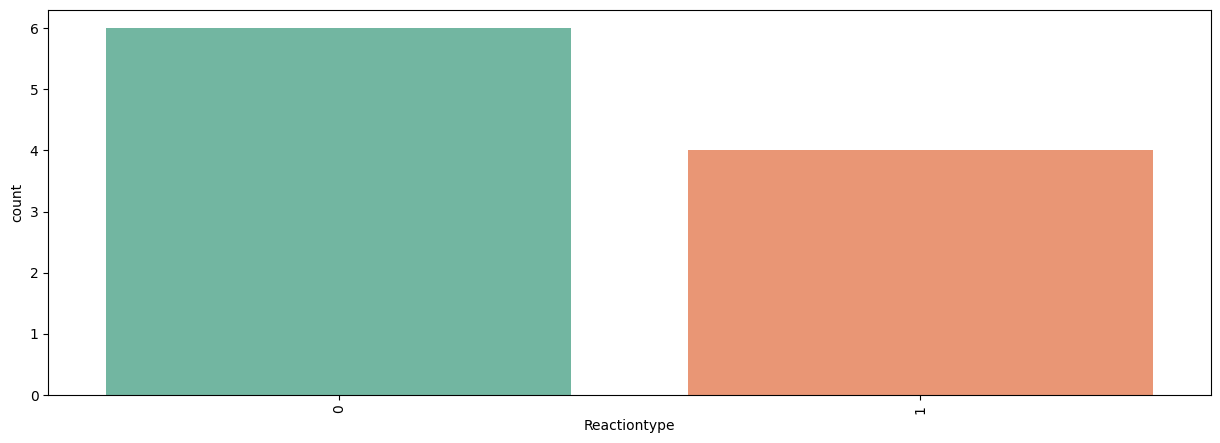

In [149]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data = dataset ,x="Reactiontype",palette="Set2")
plt.show()

In [150]:
counts = dataset['Reactiontype'].value_counts()
labels = dataset['Reactiontype'].unique()

In [151]:
dataset['Reactiontype'].unique()


array([1, 0])

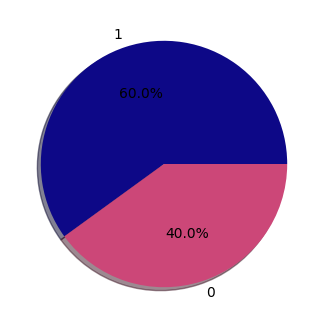

In [152]:
plt.figure(figsize=(5,4))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow= True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [153]:
dataset.head(10)

,ReviewedDate,ReviewText,SentimentScore,Reactiontype
0,3rd June 2024,â Trip Verified | My partner and I were on t...,0.044583,1
1,1st June 2024,Not Verified | We had a Premium Economy retur...,-0.018618,0
2,1st June 2024,â Trip Verified | I should like to review m...,0.225600,1
3,31st May 2024,â Trip Verified | We have flown with British...,-0.056360,0
4,31st May 2024,â Trip Verified | I sat in the plane at Vien...,-0.032143,0
5,30th May 2024,â Trip Verified | It is almost 11pm we were ...,-0.233333,0
6,29th May 2024,â Trip Verified | I booked a long haul flig...,0.102778,1
7,26th May 2024,â Trip Verified | A premium price for a sub...,-0.122222,0
8,20th May 2024,â Trip Verified | Really terrible user expe...,-0.050000,0
9,18th May 2024,â Trip Verified | Very impressed with BA. Ch...,0.282548,1


In [154]:
def cleanReview(txt):
  cleantxt=re.sub('http\S+\s','',txt)
  #cleantxt=re.sub('RT|CC','',cleantxt)
  #cleantxt=re.sub('#\S+\s+','',cleantxt)
  cleantxt=re.sub('@\S+','',cleantxt)
  cleantxt=re.sub('\r\n','',cleantxt)
  cleantxt=re.sub('[%s]' %re.escape("""!"*#$%&'()"+.-:;<=>?@[\]^_'{|}~"""),'',cleantxt)
  cleantxt=re.sub(r'[^\x00-\x7f]','',cleantxt)
  #cleantxt=re.sub('\S+','',cleantxt)
  return cleantxt

In [155]:
dataset['ReviewText']=dataset['ReviewText'].apply(lambda x : cleanReview(x))

In [156]:
dataset.head(10)

,ReviewedDate,ReviewText,SentimentScore,Reactiontype
0,3rd June 2024,Trip Verified My partner and I were on the B...,0.044583,1
1,1st June 2024,Not Verified We had a Premium Economy return...,-0.018618,0
2,1st June 2024,Trip Verified I should like to review my fl...,0.225600,1
3,31st May 2024,Trip Verified We have flown with British Air...,-0.056360,0
4,31st May 2024,Trip Verified I sat in the plane at Vienna a...,-0.032143,0
5,30th May 2024,Trip Verified It is almost 11pm we were supp...,-0.233333,0
6,29th May 2024,Trip Verified I booked a long haul flight t...,0.102778,1
7,26th May 2024,Trip Verified A premium price for a subpar ...,-0.122222,0
8,20th May 2024,Trip Verified Really terrible user experien...,-0.050000,0
9,18th May 2024,Trip Verified Very impressed with BA Check i...,0.282548,1


In [157]:
X=dataset['ReviewText'].values
X

array([' Trip Verified  My partner and I were on the BA2166 return flight from Tampa to Gatwick and I was very excited as had paid for a upgrade to Business Class, my partner flies BC with BA a lot for work but this was only my second time, we decided as it was the end of our holiday that have this will help us get some quality sleep Unfortunately that was not to be Also in Business Class were two families with children under 5 It was a very long flight listening to a toddler not just crying but screaming for seven out of the eight hours Now its not the childrens fault, I do however think that the cabin crew could have maybe internvene and helped a little more but also BA should have informed us as we paid alot of money and quite frankly could have saved that money and just had economy ticket as at least we would be a few grand better off What with that and how the checking in ground staff were treating us as if we were an inconvenience we will rethink BA moving forward',
       'Not V

In [158]:
Y=dataset['Reactiontype'].values
Y

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2,stratify = Y ,random_state = 5)

In [160]:
print(X.shape,X_train.shape,
X_test.shape,
Y_train.shape,
Y_test.shape)

(10,) (2,) (8,) (2,) (8,)


In [161]:
X_train

array([' Trip Verified  My partner and I were on the BA2166 return flight from Tampa to Gatwick and I was very excited as had paid for a upgrade to Business Class, my partner flies BC with BA a lot for work but this was only my second time, we decided as it was the end of our holiday that have this will help us get some quality sleep Unfortunately that was not to be Also in Business Class were two families with children under 5 It was a very long flight listening to a toddler not just crying but screaming for seven out of the eight hours Now its not the childrens fault, I do however think that the cabin crew could have maybe internvene and helped a little more but also BA should have informed us as we paid alot of money and quite frankly could have saved that money and just had economy ticket as at least we would be a few grand better off What with that and how the checking in ground staff were treating us as if we were an inconvenience we will rethink BA moving forward',
       ' Trip

In [162]:
X_test

array([' Trip Verified  We have flown with British Airways a few times but this last trip was by far the worst experience We werent able to check in online because the system wouldnt accept any of our passport info, so we had to wait to check in upon arrival at the airport We arrived two hours before our scheduled departure The line was backed up with only 4 stations being staffed where there was room for at least 6 more attendants to help expedite check in We talked to a few people in line and they too were unable to check in online It took the desk attendants an hour to check in the people ahead of us We told the agent we had tried to check in online but it wouldnt accept our passports, she replied it was because they need to verify each passport personally I asked that wouldnt they verify them that way anyway I also let her know we attempted to move closer to the front of the plane and could see there were seats available but couldnt secure them because we couldnt finish check in Sh

In [163]:
#converting into integer using TfidfVectorizer

In [164]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.fit_transform(X_test)

In [165]:
X_train

<2x137 sparse matrix of type '<class 'numpy.float64'>'
	with 145 stored elements in Compressed Sparse Row format>

In [166]:
X_test

<8x650 sparse matrix of type '<class 'numpy.float64'>'
	with 1022 stored elements in Compressed Sparse Row format>

In [167]:

print(X_train)

  (0, 43)	0.04933651098166767
  (0, 77)	0.04933651098166767
  (0, 97)	0.04933651098166767
  (0, 62)	0.04933651098166767
  (0, 4)	0.04933651098166767
  (0, 60)	0.04933651098166767
  (0, 118)	0.04933651098166767
  (0, 107)	0.04933651098166767
  (0, 51)	0.04933651098166767
  (0, 19)	0.04933651098166767
  (0, 58)	0.04933651098166767
  (0, 132)	0.04933651098166767
  (0, 83)	0.04933651098166767
  (0, 13)	0.04933651098166767
  (0, 50)	0.04933651098166767
  (0, 39)	0.04933651098166767
  (0, 136)	0.04933651098166767
  (0, 69)	0.04933651098166767
  (0, 8)	0.04933651098166767
  (0, 114)	0.04933651098166767
  (0, 31)	0.04933651098166767
  (0, 99)	0.04933651098166767
  (0, 44)	0.04933651098166767
  (0, 95)	0.04933651098166767
  (0, 75)	0.09867302196333534
  :	:
  (1, 24)	0.19227231375733936
  (1, 30)	0.19227231375733936
  (1, 101)	0.19227231375733936
  (1, 89)	0.19227231375733936
  (1, 22)	0.19227231375733936
  (1, 34)	0.19227231375733936
  (1, 18)	0.19227231375733936
  (1, 49)	0.19227231375733936


In [168]:
print(X_test)

  (0, 202)	0.03691629738542706
  (0, 624)	0.03093873833329659
  (0, 71)	0.02072003363895944
  (0, 397)	0.03691629738542706
  (0, 50)	0.03691629738542706
  (0, 509)	0.03691629738542706
  (0, 527)	0.03691629738542706
  (0, 352)	0.03691629738542706
  (0, 9)	0.03691629738542706
  (0, 592)	0.03691629738542706
  (0, 191)	0.03691629738542706
  (0, 99)	0.03691629738542706
  (0, 183)	0.03691629738542706
  (0, 334)	0.03691629738542706
  (0, 396)	0.02340790455662541
  (0, 106)	0.03093873833329659
  (0, 350)	0.03691629738542706
  (0, 212)	0.03691629738542706
  (0, 530)	0.04681580911325082
  (0, 312)	0.06187747666659318
  (0, 76)	0.10679037076435965
  (0, 123)	0.03093873833329659
  (0, 111)	0.03691629738542706
  (0, 75)	0.03691629738542706
  (0, 308)	0.03691629738542706
  :	:
  (7, 41)	0.19443188179182253
  (7, 227)	0.048296146457254774
  (7, 384)	0.06860363314241799
  (7, 593)	0.04533745960413157
  (7, 271)	0.034301816571208996
  (7, 585)	0.04533745960413157
  (7, 249)	0.030363025084690853
  (7, 5

In [169]:
# model

Model1 = LogisticRegression()

In [170]:
Model1.fit(X_train, Y_train)

LogisticRegression()

In [171]:
# Prediction

X_train_prediction = Model1.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [172]:
print(training_data_accuracy)

1.0


In [173]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (2, 137)
Shape of X_test: (8, 650)


In [174]:
Model2 = LogisticRegression()

In [175]:
Model2.fit(X_test, Y_test)

LogisticRegression()

In [176]:
# Prediction

X_test_prediction = Model2.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [177]:
print(testing_data_accuracy )

0.625


In [178]:
#Saving the model


In [179]:
import pickle

In [187]:
filename = 'pckl1.sav'
pickle.dump(Model1,open(filename,'wb'))

In [188]:
filename1 = 'pckl2.sav'
pickle.dump(Model2,open(filename1,'wb'))

In [182]:
#loading the model


In [191]:
loaded_model1 = pickle.load(open('/content/pckl1.sav','rb'))

In [194]:
X_new1 = X_train[1]
print(Y_train[1])

prediction = Model1.predict(X_new1)
print(prediction)

if(prediction[0] == 0):
  print('Negative Reaction')

else:
  print("Positive reaction")


0
[0]
Negative Reaction


In [183]:
loaded_model = pickle.load(open('/content/pckl2.sav','rb'))

In [184]:
#using this model for new predictions

In [190]:
X_new = X_test[2]
print(Y_test[2])

prediction = Model2.predict(X_new)
print(prediction)

if(prediction[0] == 0):
  print('Negative Reaction')

else:
  print("Positive reaction")


1
[0]
Negative Reaction
